# Clustering German Credit Risk

### Using K-MEANS, Hierarchical Clustering, and DBSCAN

<br>
<br>
<br>
We want to do segmentation to German Credit data to be able to grouped data to "Good Risk" which is there are high change for people in this list to return the credit thus has low risk. Then, there are "Moderate risk" people that is has moderate change to return the credit. And lastly, "Bad Risk" people that has low change or Risky change to return the credit.

First we import modulues and packages

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import axes3d,Axes3D
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


<br>
<br>
We read data german-credit-risk

In [441]:
data = pd.read_csv('german_credit_data.csv')
data=data.iloc[:,1:]
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [442]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [443]:
data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

<br>
<br>
There are quite null values in 'Saving accounts' and 'Checking account'. In this clustering, we use only numeric values (because using these category the result are similiar and even hard to intepret).  
<br>
<br>

In [444]:
data2=data.drop(columns=['Checking account','Saving accounts'])
data2.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose
0,67,male,2,own,1169,6,radio/TV
1,22,female,2,own,5951,48,radio/TV
2,49,male,1,own,2096,12,education
3,45,male,2,free,7882,42,furniture/equipment
4,53,male,2,free,4870,24,car


In [445]:
data2.head()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose
0,67,male,2,own,1169,6,radio/TV
1,22,female,2,own,5951,48,radio/TV
2,49,male,1,own,2096,12,education
3,45,male,2,free,7882,42,furniture/equipment
4,53,male,2,free,4870,24,car


In [446]:
data3=data2.drop(columns=['Sex','Housing','Purpose','Job'])
data3.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


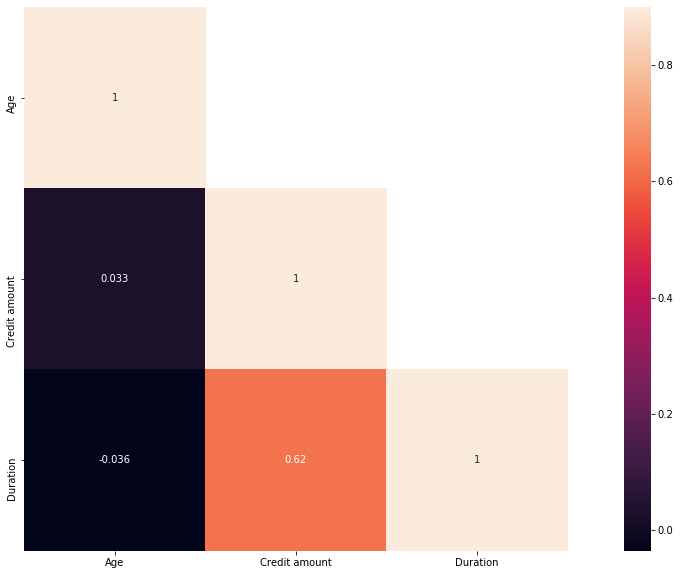

In [447]:
#create correlation with hitmap
data_numer=data3
#create correlation
corr = data_numer.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (20,5))
fig.set_size_inches(20,10)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

<br>
<br>
You see that Credit amount and Duration is correlated. BUT we do not drop down these variables because even if it corelated, Credit amount/Duration still has information values. We could for instances, divide these 2 variabels so we ger Credit Amount/Duration but we do not use it either as even if these 2 variables corelated, it is not highly corelated, means increasing of Credit amount not always, increasing in Duration. It make sense, because as more high credit amount, it take more time to complete its payment. But as it is not corelated=1, it means that there are customer with high amount pay faster or with low amount pay slower. BEcause it could be means something, we still use these 3 variables.
<br>

<br>
<br>
Because in clustering algorithm, we use distance (euclidean), it is recomended to scale data so all features have same range values. 

In [448]:
scale=MinMaxScaler()
scale2=scale.fit(data3)
data_s=scale2.transform(data3)
X=np.array(data_s)
X

array([[0.85714286, 0.05056674, 0.02941176],
       [0.05357143, 0.31368989, 0.64705882],
       [0.53571429, 0.10157368, 0.11764706],
       ...,
       [0.33928571, 0.03048311, 0.11764706],
       [0.07142857, 0.08776274, 0.60294118],
       [0.14285714, 0.23803235, 0.60294118]])

## CLUSTERING ALGORITHM
<br>
<br>
We use KMEANS, HIERARCHICAL, DBSCAN. First part, we use previous original data without tranforming it or anything.First using k means, we want to know which cluster is the best/

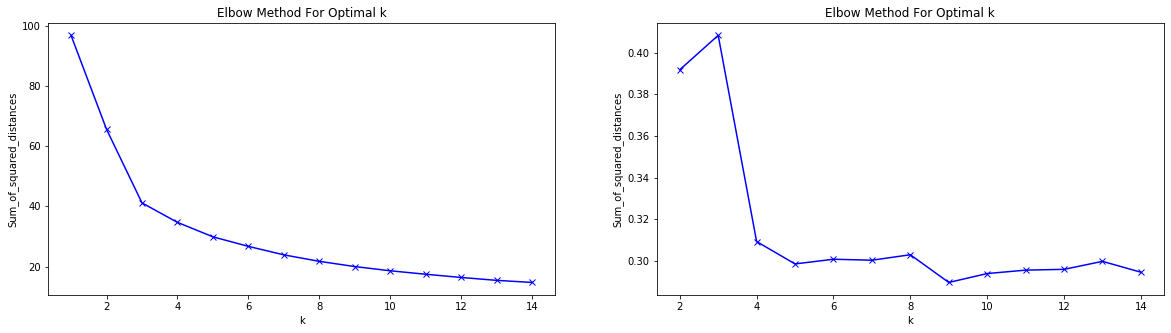

In [401]:
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()


<br>
<br>
Using Elbow and Silhouette, it is best to use three cluster. But before we jump down to Kmeans, we want to know what our dendogram in Hierarchical Clustering says :

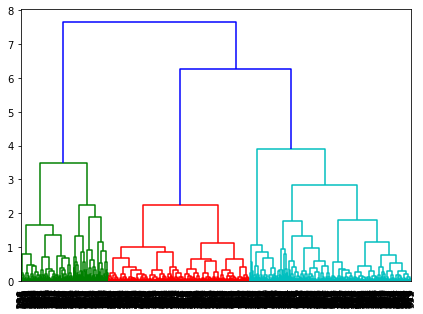

In [402]:
plt.figure(figsize=(7,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),labels=data3.index)

plt.xticks(rotation=90,fontsize=10)
plt.show()

<br>
<br>
Previously, we already use 'single','average','complete','ward' and 'ward' is the best linkage to cluster our data. Notice that our dendogram algorithm says that 3 cluster is the best. We conclude that 3 clusters is the best
<br>
<br>
First, we use Hierarchical clustering. Because we use 3 features, we can 3d plot them. notice that data is clustered to bottom left corner, and its quite hard to able to divide this data.
<br>
<br>

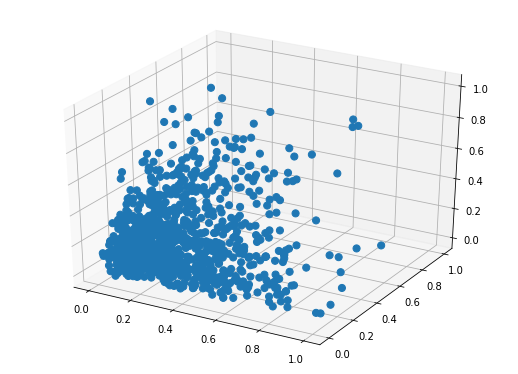

In [449]:
fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], zs=X[:,2],s=50,alpha=1)
plt.show()

silhouette score :  0.302403501729303


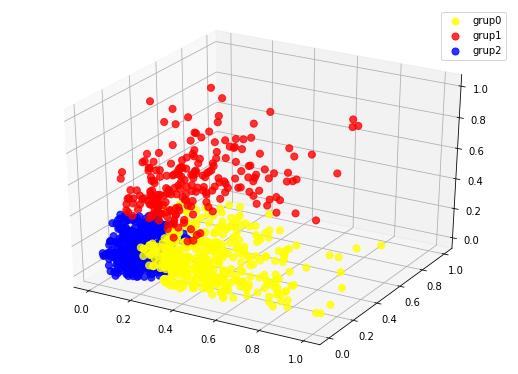

In [450]:
hir=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
mod=hir.fit(X)
pred=mod.labels_
print('silhouette score : ',silhouette_score(X,km.labels_))

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,color='yellow',label='grup0')
ax.scatter(X[pred==1,0], X[pred==1,1], zs=X[pred==1,2],s=50,alpha=0.8,color='red',label='grup1')
ax.scatter(X[pred==2,0], X[pred==2,1], zs=X[pred==2,2],s=50,alpha=0.8,color='blue',label='grup2')

plt.legend()
plt.show()

Explained Information :  [0.46901862 0.42665963]


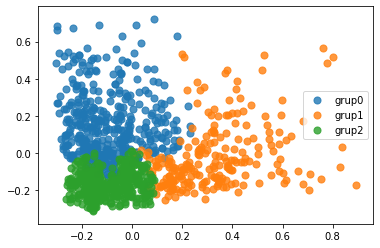

In [451]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)


plt.scatter(res[pred==0,0], res[pred==0,1],s=50,label='grup0',alpha=0.8)
plt.scatter(res[pred==1,0], res[pred==1,1],s=50,label='grup1',alpha=0.8)
plt.scatter(res[pred==2,0], res[pred==2,1],s=50,label='grup2',alpha=0.8)
plt.legend(loc='best')
plt.show()

<br>
<br>
We can see that our data divided into 3 clusters. We use PCA to be able to visualize the result into 2dimension by variable reduction 3 variables into 2 variabels. Explained information tells us how much information in original data is absorbed in PCA variables. There are some cluster, especialy grup0 and grup2. Now, we use kmeans
<br>
<br>

silhouette score :  0.4082289981522351


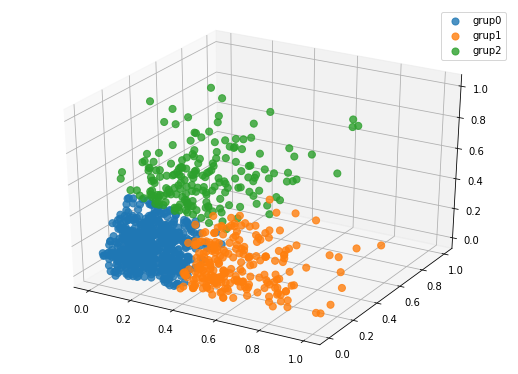

In [452]:
kmeans=KMeans(n_clusters=3)
km=kmeans.fit(X)
pred=km.labels_
center=km.cluster_centers_

print('silhouette score : ',silhouette_score(X,km.labels_))

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,label='grup0')
ax.scatter(X[pred==1,0], X[pred==1,1], zs=X[pred==1,2],s=50,alpha=0.8,label='grup1')
ax.scatter(X[pred==2,0], X[pred==2,1], zs=X[pred==2,2],s=50,alpha=0.8,label='grup2')
plt.legend()
plt.show()

Explained Information :  [0.46901862 0.42665963]


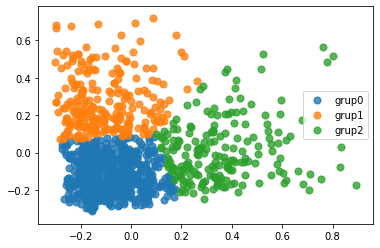

In [453]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)


plt.scatter(res[pred==0,0], res[pred==0,1],s=50,label='grup0',alpha=0.8)
plt.scatter(res[pred==1,0], res[pred==1,1],s=50,label='grup1',alpha=0.8)
plt.scatter(res[pred==2,0], res[pred==2,1],s=50,label='grup2',alpha=0.8)
plt.legend(loc='best')
plt.show()

In [454]:
Label=pd.DataFrame()
Label['Kmeans Original']=pred
Label.head()

,Kmeans Original
0,1
1,2
2,1
3,2
4,1


<br>
<br>
Using Kmeans, we see that our data clustered nicely, there are visible line that divide our data. Silhouette score hierarchical and kmeans is similliar. BEcause visualy, using Kmeans is better. We choose Kmeans over hiereachical.
<br>
<br>
Now, we use DBSCAN and use looping to find the right parameter. Noted that we comment our code here because in the end, the result is the same when we use eps=0.075 and nsampels=20

In [507]:
# sill=pd.DataFrame(columns=['(i,j)','sill'])
# for i in np.arange(0.01,0.5,0.01):
#     for j in range(2,15):
#         dbscan = DBSCAN(eps=i,min_samples=j)
#         mod = dbscan.fit(X)
#         pred=mod.labels_
#         try :
#             silhouette_score(X,pred)
#         except:
#             continue
#         a=pd.DataFrame([[(i,j),silhouette_score(X,pred)]],columns=['(i,j)','sill'])
#         sill=sill.append(a)
# sill.sort_values('sill',ascending=False).head(10)

In [508]:
# sill[sill['sill']<0.4].sort_values('sill',ascending=False).head(5)

In [509]:
# dbscan = DBSCAN(eps=0.060000000000000005,min_samples= 14)
# mod = dbscan.fit(X)
# pred=mod.labels_
# print(silhouette_score(X,pred))
# print(pd.Series(pred).unique())

# fig = plt.figure(figsize=(7,5))
# ax = Axes3D(fig)
# ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,label='grup0')
# ax.scatter(X[pred==-1,0], X[pred==-1,1], zs=X[pred==-1,2],s=50,alpha=0.8,label='grup1-Noise')
# plt.legend()
# plt.show()

0.3386492565287925


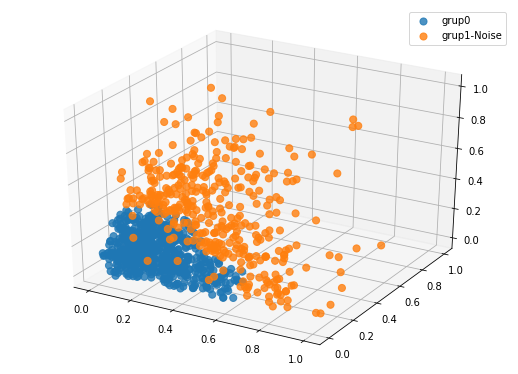

In [409]:


dbscan = DBSCAN(eps=0.075,min_samples=20)
mod = dbscan.fit(X)
pred=mod.labels_
print(silhouette_score(X,pred))

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,label='grup0')
ax.scatter(X[pred==-1,0], X[pred==-1,1], zs=X[pred==-1,2],s=50,alpha=0.8,label='grup1-Noise')
plt.legend()
plt.show()

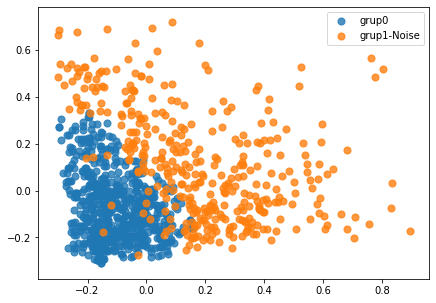

In [410]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)


fig = plt.figure(figsize=(7,5))
plt.scatter(res[pred==0,0], res[pred==0,1],s=50,label='grup0',alpha=0.8)
plt.scatter(res[pred==-1,0], res[pred==-1,1],s=50,label='grup1-Noise',alpha=0.8)
plt.legend()
plt.show()

<br>
<br>
Using DBSCAN, after we tune the model, even using looping, this is the best cluster that we get yet. Notice that there are some data in grup1-noise that overlapping with grup0. Because visualy, DBSCAN is worse than kmeans and hierarchical and also its silhouette is worse. 
<br>
<br>
So we use KMEANS 3 cluster

### TRIAL USING LOGARITHM TRANSFORMATION

<br>
<br>
Notice that previously, Our data clustered in bottom left corner. To make our data more distributed, we use tranformation. We use logarithm on our numeric data

In [510]:
data4=data3
data4.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


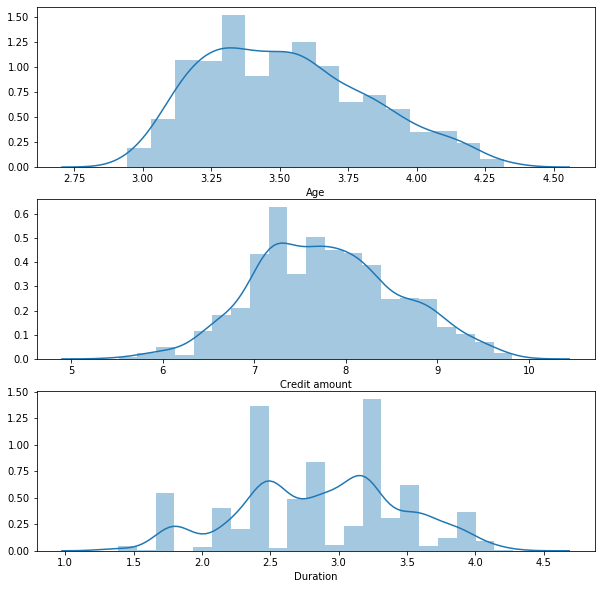

In [511]:
data5=np.log(data4)
f=plt.figure(figsize=(10,10))
j=1
for i in range(3):
    f.add_subplot(3,1,j)
    sns.distplot(data5.iloc[:,j-1])
    j+=1
plt.show()

<br>
<br>
Now, our data more symetrical. Now we use standardation and use our clustering algorithm

In [512]:
scale=MinMaxScaler()
scale2=scale.fit(data5)
data_s=scale2.transform(data5)
X=np.array(data_s)
X

array([[0.91785036, 0.35871198, 0.1402813 ],
       [0.1067722 , 0.73718409, 0.8597187 ],
       [0.68998355, 0.49450014, 0.38009377],
       ...,
       [0.50482329, 0.27166333, 0.38009377],
       [0.13914669, 0.46483664, 0.8373899 ],
       [0.25592521, 0.67608242, 0.8373899 ]])

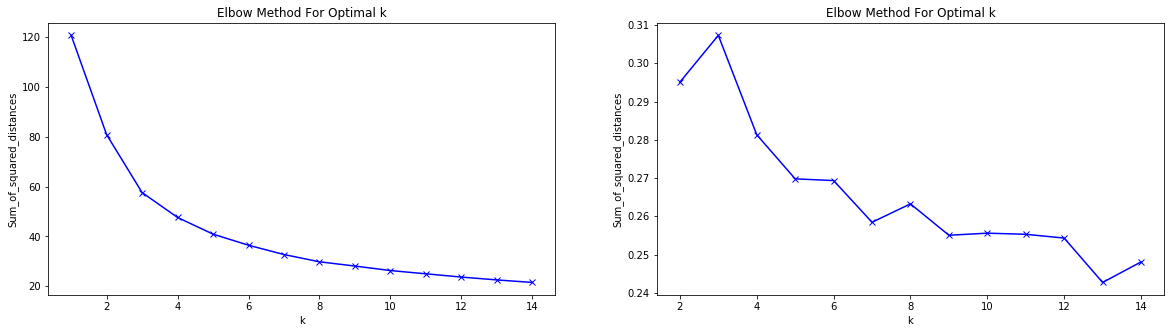

In [513]:
from sklearn.metrics import silhouette_score
Sum_of_squared_distances = []
sill=[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    if k!=1:
        sill.append(silhouette_score(X,km.labels_))

f=plt.figure(figsize=(20,5))
f.add_subplot(1,2,1)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

f.add_subplot(1,2,2)
plt.plot(K[1:], sill, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')


plt.show()


<br>
<br>
It seems that 3 still the best choice number of cluster even with this data. Using dendogram we see that now, dendogram choose 2 cluster as it best choice. but if you cut in y=5 more or less, we can divide our data to 3 cluster and data distributed. We can conclude that 3 cluster, is the best number of cluster for our case to make it comparable to previous algorithm.

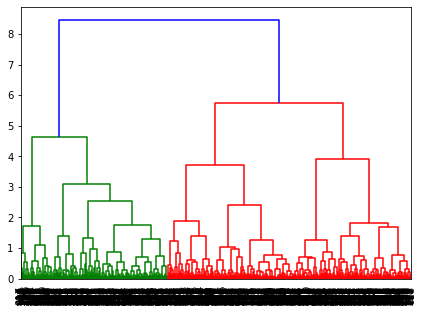

In [415]:
plt.figure(figsize=(7,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'),labels=data5.index)

plt.xticks(rotation=90,fontsize=10)
plt.show()

silhouette score :  0.3073133079763859


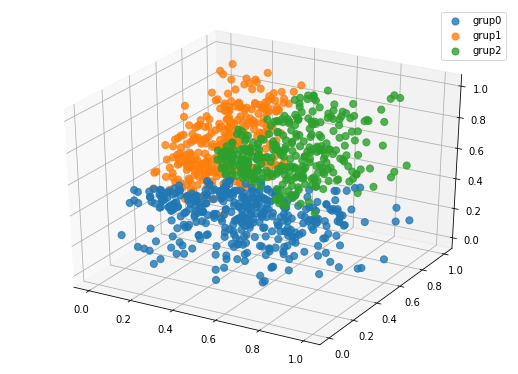

In [439]:
hir=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
mod=hir.fit(X)
pred=mod.labels_
print('silhouette score : ',silhouette_score(X,km.labels_))

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,label='grup0')
ax.scatter(X[pred==1,0], X[pred==1,1], zs=X[pred==1,2],s=50,alpha=0.8,label='grup1')
ax.scatter(X[pred==2,0], X[pred==2,1], zs=X[pred==2,2],s=50,alpha=0.8,label='grup2')

plt.legend()
plt.show()

Explained Information :  [0.49367958 0.39474578]


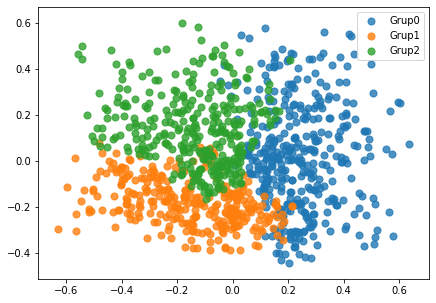

In [417]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)



fig = plt.figure(figsize=(7,5))
plt.scatter(res[pred==0,0], res[pred==0,1],alpha=0.8,label='Grup0',s=50)
plt.scatter(res[pred==1,0], res[pred==1,1],alpha=0.8,label='Grup1',s=50)
plt.scatter(res[pred==2,0], res[pred==2,1],alpha=0.8,label='Grup2',s=50)
plt.legend()
plt.show()

<br>
<br>
Using hierarchical, our silhouette is worsen and visually, there are many overlapping in each cluster. Now we use Kmeans

silhouette score :  0.3073133079763859


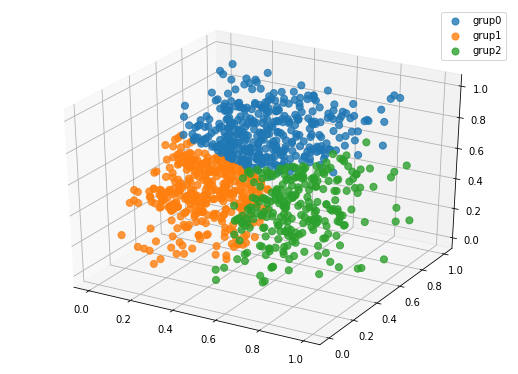

In [518]:
kmeans=KMeans(n_clusters=3)
km=kmeans.fit(X)
pred=km.labels_
center=km.cluster_centers_

print('silhouette score : ',silhouette_score(X,km.labels_))


fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[pred==0,0], X[pred==0,1], zs=X[pred==0,2],s=50,alpha=0.8,label='grup0')
ax.scatter(X[pred==1,0], X[pred==1,1], zs=X[pred==1,2],s=50,alpha=0.8,label='grup1')
ax.scatter(X[pred==2,0], X[pred==2,1], zs=X[pred==2,2],s=50,alpha=0.8,label='grup2')
plt.legend()
plt.show()

Explained Information :  [0.49367958 0.39474578]


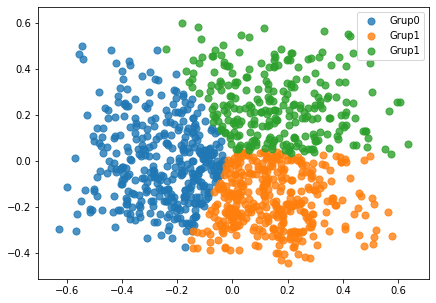

In [519]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)
print('Explained Information : ',pca.explained_variance_ratio_)



fig = plt.figure(figsize=(7,5))
plt.scatter(res[pred==0,0], res[pred==0,1],label='Grup0',s=50,alpha=0.8)
plt.scatter(res[pred==1,0], res[pred==1,1],label='Grup1',s=50,alpha=0.8)
plt.scatter(res[pred==2,0], res[pred==2,1],label='Grup1',s=50,alpha=0.8)
plt.legend()
plt.show()

<br>
<br>
Using Kmeans, 3d plot still looks there are overlapping. But if we use 2d plot by PCA, Our data is clustered nicely, and seem like there are a line that serperate them. Sihouette Score is worsen compared to kmeans using original data. We now compared The result of original clustering and transforamtion clustering

In [520]:
Label['Kmeans transformation']=pred
Label.head()

,Kmeans Original,Kmeans transformation
0,1,2
1,2,0
2,1,2
3,2,0
4,1,2


<br>
<br>
It looks like the result is difference. But noticed that the labeling on clusters is random. We want to see the length of each cluster

In [521]:
Label['Kmeans Original'].value_counts()

0    574
1    231
2    195
Name: Kmeans Original, dtype: int64

In [522]:
Label['Kmeans transformation'].value_counts()

0    372
1    366
2    262
Name: Kmeans transformation, dtype: int64

<br>
<br>
It looks like using original data, there are more unbalanced number of obsevation in each cluster compared to using logarithm transformation. We furhter analyze this result further below.
<br>
<br>
Optionaly, we use Gausian Mixture to cluster our data. Notes that it perform badly compared to kmeans. SO we still choose Kmeans

silhouette score :  0.28572611804579534


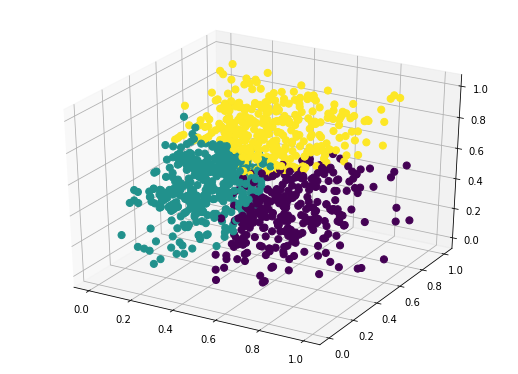

In [523]:
from sklearn.mixture import GaussianMixture

#Predict GMM cluster membership
gm = GaussianMixture(n_components=3).fit(X).predict(X)

print('silhouette score : ',silhouette_score(X,gm))

fig = plt.figure(figsize=(7,5))
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], zs=X[:,2],c=gm,s=50,alpha=1)
plt.show()

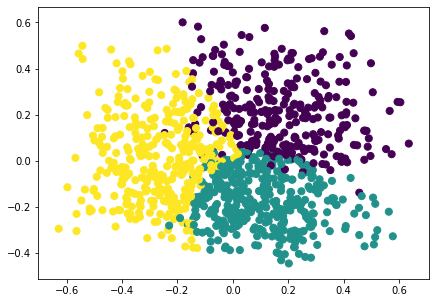

In [525]:
pca = PCA(n_components=2)
res = pca.fit_transform(X)

fig = plt.figure(figsize=(7,5))
plt.scatter(res[:,0], res[:,1],c=gm,s=50)
plt.show()

### Evaluation and Cluster Result Analysis

<br>
<br>
We use 2 results, using kmeans original and kmeans transformation. First using kmeans original we get :

In [663]:
Label.head(10)

,Kmeans Original,Kmeans transformation
0,1,2
1,2,0
2,1,2
3,2,0
4,1,2
5,2,0
6,1,2
7,2,0
8,1,2
9,2,0


In [664]:
pred=np.array(Label.iloc[:,0])

grup0=data.iloc[pred==0,:]
grup1=data.iloc[pred==1,:]
grup2=data.iloc[pred==2,:]

In [527]:
grup0.describe()

,Age,Job,Credit amount,Duration
count,574.000000,574.00000,574.000000,574.000000
mean,29.520906,1.84669,2221.750871,16.452962
std,5.479017,0.61185,1311.000562,6.841796
min,19.000000,0.00000,276.000000,4.000000
25%,25.000000,2.00000,1275.000000,12.000000
50%,29.000000,2.00000,1924.000000,15.000000
75%,34.000000,2.00000,2959.250000,24.000000
max,40.000000,3.00000,8471.000000,36.000000


In [528]:
grup1.describe()

,Age,Job,Credit amount,Duration
count,231.000000,231.000000,231.000000,231.000000
mean,51.497835,1.805195,2492.424242,16.181818
std,8.448758,0.704747,1929.270994,7.847559
min,41.000000,0.000000,250.000000,4.000000
25%,45.000000,1.000000,1249.500000,12.000000
50%,49.000000,2.000000,1881.000000,13.000000
75%,57.000000,2.000000,3068.000000,24.000000
max,75.000000,3.000000,14896.000000,42.000000


In [529]:
grup2.describe()

,Age,Job,Credit amount,Duration
count,195.000000,195.000000,195.000000,195.000000
mean,34.384615,2.189744,7283.194872,39.594872
std,9.016638,0.634000,3373.606589,10.060896
min,21.000000,0.000000,1819.000000,6.000000
25%,27.000000,2.000000,4579.500000,36.000000
50%,32.000000,2.000000,6948.000000,36.000000
75%,39.500000,3.000000,9214.000000,48.000000
max,63.000000,3.000000,18424.000000,72.000000


<br>
<br>
There are not much difference between grup0 and grup1 and therefore it's difficult to compare these 3 clusters. 

<br>
<br>
Now using Transformation
<br>
<br>

In [714]:
pred=np.array(Label.iloc[:,1])

grup0=data.iloc[pred==0,:]
grup1=data.iloc[pred==1,:]
grup2=data.iloc[pred==2,:]

In [715]:
grup0.describe()

,Age,Job,Credit amount,Duration
count,372.000000,372.000000,372.000000,372.000000
mean,33.637097,2.102151,5589.368280,32.432796
std,8.478291,0.618925,3125.019198,10.949938
min,20.000000,0.000000,909.000000,12.000000
25%,27.000000,2.000000,3234.750000,24.000000
50%,32.000000,2.000000,4599.500000,30.000000
75%,38.000000,2.000000,7190.000000,36.000000
max,63.000000,3.000000,18424.000000,72.000000


In [716]:
grup1.describe()

,Age,Job,Credit amount,Duration
count,366.000000,366.000000,366.000000,366.000000
mean,27.814208,1.819672,1760.956284,13.836066
std,4.645035,0.597021,1115.995791,5.351268
min,19.000000,0.000000,276.000000,4.000000
25%,24.000000,2.000000,1160.500000,10.000000
50%,27.000000,2.000000,1496.000000,12.000000
75%,32.000000,2.000000,2141.750000,18.000000
max,37.000000,3.000000,14555.000000,27.000000


In [717]:
grup2.describe()

,Age,Job,Credit amount,Duration
count,262.000000,262.000000,262.000000,262.000000
mean,49.057252,1.740458,2089.706107,14.404580
std,9.521933,0.706703,1617.178829,6.649148
min,36.000000,0.000000,250.000000,4.000000
25%,41.000000,1.000000,1200.000000,10.000000
50%,47.000000,2.000000,1541.000000,12.000000
75%,55.000000,2.000000,2513.000000,18.000000
max,75.000000,3.000000,14896.000000,42.000000


<br>
<br>
From here, we see that using clustering from data that has been transformed, there are more significant difference compared to using original data. For this reason we use transformation data. Now consider this insight :
<br>
<br>

In [718]:
Job=pd.DataFrame()
Job['JOB-Grup0']=grup0['Job'].value_counts()/sum(grup0['Job'].value_counts())
Job['JOB-Grup1']=grup1['Job'].value_counts()/sum(grup1['Job'].value_counts())
Job['JOB-Grup2']=grup2['Job'].value_counts()/sum(grup2['Job'].value_counts())
Job

,JOB-Grup0,JOB-Grup1,JOB-Grup2
2,0.639785,0.693989,0.526718
3,0.236559,0.076503,0.122137
1,0.112903,0.202186,0.320611
0,0.010753,0.027322,0.030534


<br>
<br>
Here, we see that grup0 is more high-skilled in job compared to other group. We can assume that grup2 is where Good Risk is, because they have more high valued job and therefore, you can see from statistics descriptive above it has more credit amount and duration

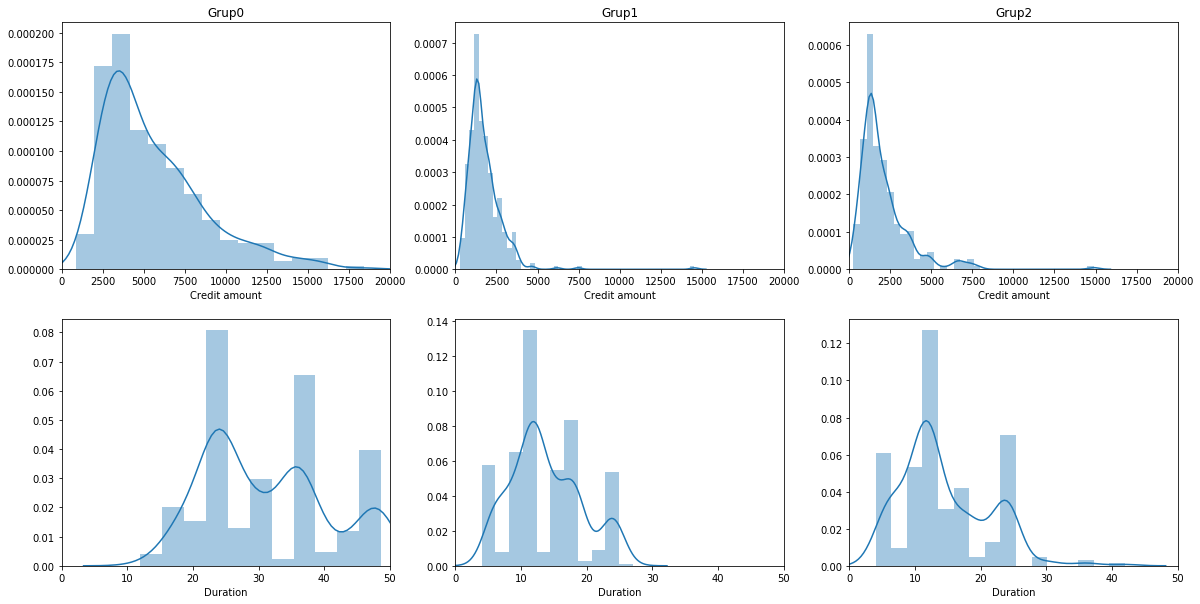

In [719]:
f=plt.figure(figsize=(20,10))
for i in range(6):
    if i<=2:
        
        f.add_subplot(2,3,i+1)
        sns.distplot(data.iloc[pred==i,6])
        plt.title('Grup'+str(i))
        plt.axis(xmin=0,xmax=20000)
    elif i>2 & i<=6:
        f.add_subplot(2,3,i+1)
        sns.distplot(data.iloc[pred==i-3,7])
        plt.axis(xmin=0,xmax=50)

plt.show()

<br>
<br>
Just as in statistic descriptive we see that grup0 has broader range of credit amount and has more duration. Grup1 and grup2 has similiar Credit amount and Duration but you can see that Grup1 has less maksimum values of those variables
<br>
<br>

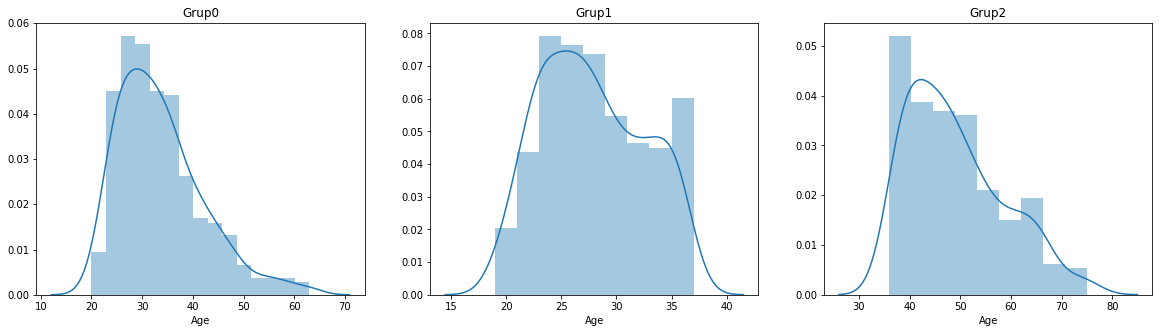

In [720]:
f=plt.figure(figsize=(20,5))
for i in range(3):
    if i<=2:
        f.add_subplot(1,3,i+1)
        sns.distplot(data.iloc[pred==i,0])
        plt.title('Grup'+str(i))
plt.show()


<br>
<br>
In age distribution, grup0 and grup2 has broader range of age, and grup1 has 'productive age'
<br>

In [721]:
Saving=pd.DataFrame()
Saving['Saving-Grup0']=grup0['Saving accounts'].value_counts()/sum(grup0['Saving accounts'].value_counts())
Saving['Saving-Grup1']=grup1['Saving accounts'].value_counts()/sum(grup1['Saving accounts'].value_counts())
Saving['Saving-Grup2']=grup2['Saving accounts'].value_counts()/sum(grup2['Saving accounts'].value_counts())
Saving

,Saving-Grup0,Saving-Grup1,Saving-Grup2
little,0.737201,0.742857,0.732057
moderate,0.153584,0.130159,0.081340
quite rich,0.071672,0.066667,0.100478
rich,0.037543,0.060317,0.086124


In [722]:
Check=pd.DataFrame()
Check['Check-Grup0']=grup0['Checking account'].value_counts()/sum(grup0['Checking account'].value_counts())
Check['Check-Grup1']=grup1['Checking account'].value_counts()/sum(grup1['Checking account'].value_counts())
Check['Check-Grup2']=grup2['Checking account'].value_counts()/sum(grup2['Checking account'].value_counts())
Check

,Check-Grup0,Check-Grup1,Check-Grup2
moderate,0.519149,0.444444,0.321918
little,0.417021,0.457778,0.500000
rich,0.063830,0.097778,0.178082


<br>
<br>
These two tables, tells that grup2 has in general richest account compared to others. Notes that these 2 variables has many NaN values. Grup2 has more rich but it also has more Little. It quite confusing insight from these tables.

In [723]:
Housing=pd.DataFrame()
Housing['House-Grup0']=grup0['Housing'].value_counts()/sum(grup0['Housing'].value_counts())
Housing['House-Grup1']=grup1['Housing'].value_counts()/sum(grup1['Housing'].value_counts())
Housing['House-Grup2']=grup2['Housing'].value_counts()/sum(grup2['Housing'].value_counts())
Housing

,House-Grup0,House-Grup1,House-Grup2
own,0.704301,0.704918,0.736641
free,0.155914,0.038251,0.137405
rent,0.139785,0.256831,0.125954


In [724]:
Purpose=pd.DataFrame()
Purpose['Purpose-Grup0']=grup0['Purpose'].value_counts()/sum(grup0['Purpose'].value_counts())
Purpose['Purpose-Grup1']=grup1['Purpose'].value_counts()/sum(grup1['Purpose'].value_counts())
Purpose['Purpose-Grup2']=grup2['Purpose'].value_counts()/sum(grup2['Purpose'].value_counts())
Purpose

,Purpose-Grup0,Purpose-Grup1,Purpose-Grup2
car,0.346774,0.292350,0.385496
radio/TV,0.225806,0.327869,0.290076
furniture/equipment,0.180108,0.215847,0.133588
business,0.147849,0.076503,0.053435
education,0.053763,0.043716,0.087786
vacation/others,0.021505,0.002732,0.011450
repairs,0.018817,0.021858,0.026718
domestic appliances,0.005376,0.019126,0.011450


<br>
<br>
In house, notice that Even if all Group in general has 'Own' house, Grup1 has more rent compared to Own and Free. In above table, we see that Grup1 has mostly use credit to buy Radio/TV.  <br>
<b>CONCLUSION</b>

1. Grup 1 Overal seen from AGE, has most 'Productive Age'.Also mostly, Credit used for furniture, Radio/TV and others. With Credit amount and Duration also one of the lowest compared to other group. We conclude that Grup1 is included to segment "Good Risk".<br>
2. Grup0 has the most used credit to business. It has the most duration and Credit amount compared to others. But, we also see that Grup0 has the most skilled job compared to others. Even then, grup0 has many productive age too. It seems that Grup0 is have customer that belong to 'entepreneur' and also businessman/woman and people who has good skils and brave to take risk. We concluded that because it has the most credit amount (but saving accounts and others is fairly the same with other groups), it belong to "Bad Risk" (cause there are high amount of risk to paid the high amount of credit). <br>
3. Grup2 has more 'older' compared to other. Also it has RICH but also, the most little. It seems that mostly, this group belong to old, traditional and more mature people. it has the less skilled job compared to others. We can assume that mostly, people that has steady jobs and others are here. We concluded that Grup2 is moderate Risk.

# CREATED BY

## ANDREAS MULYA RAHARDJA